/home/romuald/ENSEIGNEMENT/1-JupyterNotebooks/pyPhysChem



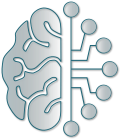

**Start at:** Saturday 06 December 2025, 15:24:04  
**Hostname:** localhost.localdomain (Linux)

<p style="text-align: center"><img width="800px" src="./config/svg/pyPhysChemBanner.svg" style="margin-left:auto; margin-right:auto"/></p>

In [1]:
import os
import sys

print(os.getcwd())
cwd0 = './config/'
sys.path.append(cwd0)

import visualID_Eng as vID
from visualID_Eng import color,bg,fg,hl
vID.init(cwd0)
import tools4pyPhysChem as t4pPC

__author__ = "romuald.poteau@utoulouse.fr"
__version__ = "20250925"

# Molecular representations

<div class="introT" title="What is a molecule?">

A molecule is a group of atoms that are connected through chemical bonds. The number of atoms can range from only a few (e.g., in low molecular weight drugs) to several thousand (e.g., in proteins) or even millions (e.g., in DNA molecules). 

The properties of a molecule emerge in a non-trivial way from the interplay of its constituent atoms. From the viewpoint of physics, molecules are complex three-dimensional objects that are dynamic rather than static and that exhibit quantum mechanical properties. Given the principles of quantum physics, the knowledge of the exact wavefunction $\Psi(\textbf{R},t)$ of a molecule gives access to all its properties.

Depending on the task you want to solve, a simplified view of molecules might be helpful. 

</div>
<br>
<div class="introT" title="Molecular representations for humans">

The easiest way to identify a molecule is its trivial name. For example, aspirin. This is only possible for well-known molecules.

Alternatively, the IUPAC nomenclatures of organic and inorganic chemistry can be used. The goal is that each possible molecule is associated with a name that is easy to understand and that unambiguously identifies the molecule. 

*Example*: The aspirin molecule has the IUPAC name: 2-acetyloxybenzoic acid. It is then possible, from this name, to draw the 2D representation of aspirin. Chemists actually most frequently think about **chemical structure in 2D**, whereas **molecules actually exist in 3D physical space**. 2D representations are designed to mimic the experience of drawing structural formulas on paper. 


<p style="text-align:center;"><img src="./Molecules-data/Aspirin.png" alt="aspirin" width="15%"/></p>

</div>
<br>
<div class="introT" title="Molecular representations in the age of cheminformatics">
    
In order for chemists to rely on insights from cheminformatics, it is important to understand the way in which standard chemical softwares or computer libraries store and analyze chemical structure. Therefore, cheminformatics depends upon the **coding and the use of representations of molecular structures and related data** that are understandable both to human scientists and to machine algorithms, including **machine learning algorithms**.
    
The 3D conformation of a molecule, and the relative position of functional groups is however often of key importance since it determines its properties. Atomic coordinates may be determined experimentally (typically via x-ray crystallography), or calculated (using force-fields, quantum chemistry, molecular dynamics or composite models such as docking)

---

**SMILES** (Simplified Molecular Input Line Entry Specification) is the most widely used text-based representation and can be handled by all common frameworks, so it is probably be a good starting point. SMILES uses a combination of letters, numbers, and symbols to represent the atoms and bonds in a molecule. The letters identify the elements, the symbols specify the connectivity/branching structure. The SMILES coding of aspirin is: `CC(=O)OC1=CC=CC=C1C(=O)O`, where the `C1=CC=CC=C1` is the aromatic ring, whereas `CC(=O)O` and `C(=O)O` stand for the acetyloxy and carboxylic acids functional groups. 

</div>
<br>
<div class="rqE">

**<span style="color:red">Prerequisite.</span> Basic knowledge on:**
- chemical databases, such as [PubChem](https://pubchem.ncbi.nlm.nih.gov/) or [ChemSpider](https://www.chemspider.com/)
- the simplified molecular-input line-entry system (SMILES), which is a specification in the form of a line notation for describing the structure of chemical species using short ASCII strings ([wikipedia](https://en.wikipedia.org/wiki/Simplified_molecular-input_line-entry_system))

</div>

## 3D representation

<div class="intro">
    
3D modeling software are powerful tools that help many professionals create complex 3D graphics and visualize their work. In the field of chemistry, there is various software for molecular modeling and visualization. We will use in the present notebook the `py3Dmol` widget in order to embed an interactive [3Dmol.js](http://3dmol.org) viewer in a notebook. It will actually return a 3D representation of a molecule that may be used as a teaching tool, or for research e.g., in chemistry and biochemistry. 
</div>

In [ ]:
# uncomment this line if you need to install py3Dmol
# !pip install py3Dmol

In [2]:
import py3Dmol

### The Molfile format

<div class="intro">
MDL Molfile is a file format for holding information about the atoms, bonds, connectivity and coordinates of a molecule.
    
Let's first briefly see on an example how a Molfile looks like. It is the anisole molecule, downloaded from the [PubChem database](https://pubchem.ncbi.nlm.nih.gov/compound/Anisole).
</div>

In [3]:
anisoleMolFile = open("./Molecules-data/anisole.mol", "r")
print(anisoleMolFile.read())
anisoleMolFile.close()

7519
  -OEChem-05112309193D

 16 16  0     0  0  0  0  0  0999 V2000
    1.8925   -0.6211    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.5699   -0.3011   -0.0003 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.1759    1.0370   -0.0002 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.3918   -1.3114   -0.0001 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.1799    1.3647    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.7476   -0.9836    0.0001 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.1417    0.3545    0.0002 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.8227    0.4610    0.0003 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.8695    1.8709   -0.0003 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0910   -2.3555    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.4879    2.4064    0.0001 H   0  0  0  0  0  0  0  0  0  0  0  0
   -2.4966   -1.7702    0.0003 H   0  0  0  0  0  0  0  0  0  0  0  0
   -3.1974    0.6096    0.0003 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.7368    1.0652 

<div class="intro">

`py3Dmol` can nicely give an interactive representation of this MDL Molfile coding. 
</div>

In [4]:
MolView = py3Dmol.view(width=400,height=400)
with open("./Molecules-data/anisole.mol") as ifile:
    mol = ifile.read()
MolView.addModel(mol)
MolView.setStyle({'sphere':{'scale':0.5},'stick':{}})
MolView.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

<div class="intro">

Let's write a class
</div>

In [5]:
import py3Dmol
class molView:
    def __init__(self,mol,source='file',w=400,h=400):
        self.mol = mol
        self.source = source
        self.w = w
        self.h = h
        self.view()

    def view(self):
        if self.source == 'file':
            v = py3Dmol.view(width=self.w,height=self.h)
            with open(self.mol) as ifile:
                mol = ifile.read()
            v.addModel(mol)
        elif self.source == 'mol':
            v = py3Dmol.view(width=self.w,height=self.h)
            v.addModel(self.mol)
        elif self.source == 'cid':
            v = py3Dmol.view(query=f'cid:{self.mol}',width=self.w,height=self.h)
        v.setStyle({'sphere':{'scale':0.3},'stick':{}})
        v.show()


In [6]:
t4pPC.centerTitle("Application of the molView class")
# example 1
mv1 = molView("./Molecules-data/anisole.mol")

# example 2
mv2 = molView(241,"cid")

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

### The xyz format

<div class="intro">
The xyz file format is a simple format that usually gives the number of atoms in the first line, a comment on the second, followed by a number of lines with atomic symbols (or atomic numbers) and cartesian coordinates. There is no information about connectivity, so that graphical softwares that depict chemical structures in 3-dimensions only show the skeleton of a coumpound
</div>

In [7]:
anisolexyzFile = open("./Molecules-data/anisole.xyz", "r")
print(anisolexyzFile.read())
anisolexyzFile.seek(0)
anisole_xyz = anisolexyzFile.read()
anisolexyzFile.close()

16
Saved after anisole.mol downloaded from PubChem
O       1.89250     -0.62110      0.00000
C       0.56990     -0.30110     -0.00030
C       0.17590      1.03700     -0.00020
C      -0.39180     -1.31140     -0.00010
C      -1.17990      1.36470      0.00000
C      -1.74760     -0.98360      0.00010
C      -2.14170      0.35450      0.00020
C       2.82270      0.46100      0.00030
H       0.86950      1.87090     -0.00030
H      -0.09100     -2.35550      0.00000
H      -1.48790      2.40640      0.00010
H      -2.49660     -1.77020      0.00030
H      -3.19740      0.60960      0.00030
H       2.73680      1.06520      0.90980
H       2.73730      1.06530     -0.90920
H       3.82670      0.02410      0.00050



In [8]:
mv = molView("./Molecules-data/anisole.xyz")

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

### The cif format

<div class="intro">

Crystallographic Information File (CIF) is a standard text file format for representing crystallographic information, promulgated by the International Union of Crystallography (IUCr). Cristallographic data can be downloaded at CCDC, the free access being restricted to a [basic search interface](https://www.ccdc.cam.ac.uk/structures/?) - you primarily have to know the DOI of the article where the X-ray data were published. The totally free [Crystallography Open Database](http://www.crystallography.net/cod/search.html) also contains a lot of structures.
</div>

In [11]:
cifFile = open("./Molecules-data/1158630.cif", "r")
print(cifFile.read())
cifFile.close()

####################################################################### 
# 
# This file contains crystal structure data downloaded from the 
# Cambridge Structural Database (CSD) hosted by the Cambridge 
# Crystallographic Data Centre (CCDC).
# 
# Full information about CCDC data access policies and citation 
# guidelines are available at http://www.ccdc.cam.ac.uk/access/V1 
# 
# Audit and citation data items may have been added by the CCDC. 
# Please retain this information to preserve the provenance of 
# this file and to allow appropriate attribution of the data. 
# 
#######################################################################

data_FOJBOV03
#This CIF has been generated from an entry in the Cambridge Structural Database
_database_code_depnum_ccdc_archive 'CCDC 1158630'
_database_code_CSD               FOJBOV03
loop_
_citation_id
_citation_doi
_citation_year
1 10.1021/om00028a082 1993
_audit_creation_method           'Created from the CSD'
_audit_update_record             

In [12]:
mv = molView("./Molecules-data/1158630.cif")


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

## RDKit, a toolkit for cheminformatics

<figure> 
<img width = "200px" src="./ML-Figures/ImagesDivers/rdkit.png" alt="API" />
</figure>

<div class="intro">
    
```RDKit``` is a collection of cheminformatics and machine-learning software written in C++ and Python. It is designed to assist in the analysis and design of small molecules and chemical compounds. It provides a set of libraries and tools for the manipulation or analysis of:
- Molecular visualization
- Molecular fingerprints & descriptors
- Substructure searching
- Chemical reactions
- Enhanced stereochemistry
- Molecular standardization
- Conformation generation
- UFF and MMFF94/MMFF94S force fields, very useful for cleaning up molecular structures
- Shape-based similarity
- Molecule-molecule alignment
    
It reads and writes a lot of formats, including MDL Molfiles and SMILES.

`RDKit` is widely used in academia, as well as in the pharmaceutical, biotech, and chemical industries for a variety of tasks such as virtual screening, lead optimization, and chemical database management. Regular updates are released at 6 months intervals.

It has a very good integration with Jupyter and pandas.The easiest way to install it is to run the command:
```bash
pip install rdkit
```

  
There are nice online documentations:
- you can first start with the [Getting Started with the RDKit in Python document](https://www.rdkit.org/docs/GettingStartedInPython.html)
- an [RDKit cookbook](https://www.rdkit.org/docs/Cookbook.html) provides example recipes of how to carry out particular tasks using the RDKit functionality from Python

The present Jupyter notebook is inspired from these two documents and from the [RDKit basics notebook of EPFL](https://github.com/schwallergroup/ai4chem_course/blob/main/notebooks/01%20-%20Basics/01d_rdkit_basics_demo.ipynb).

</div>

<div class="intro">
    
Let's first start importing relevant modules. The majority of the basic molecular functionality is found in module [rdkit.Chem](https://www.rdkit.org/docs/source/rdkit.Chem.html#module-rdkit.Chem)

</div>

In [13]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

from ipywidgets import Layout

import rdkit
from rdkit import Chem
from rdkit.Chem import (
    AllChem,
    PandasTools,
    Draw,
    Descriptors,
    MACCSkeys,
    rdFingerprintGenerator,
)

#cancel the "last operation show-up" specific of Jupyter notebooks
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

print(rdkit.__version__)

2025.03.5


### SMILES format

<div class="intro">
    
SMILES refers to a line notation for encoding molecular structures, using chemical symbols, and specifying bonds, rings, branching, aromaticity and even stereochemistry or isotopes. ```CC```, ```C=C```, ```C#C``` stand for ethane, ethene and ethyne, respectively. Typically, a number of equally valid SMILES strings can be written for a molecule. For example, ```CCO```, ```OCC``` and ```C(O)C``` all specify the structure of ethanol.

</div>

#### Creating molecules

<div class="intro">

The methoxybenzene molecule, also known as anisole, a colorless liquid with a smell reminiscent of anise seed, will be used in the first part of this notebook. Ring structures are written by breaking each ring at an **arbitrary point**, and adding numerical ring closure labels to show connectivity between non-adjacent atoms. For example, cyclohexane may be written as ```C1CCCCC1```. 

One possible SMILES description for anisole is: ```C1=CC(OC)=CC=C1```. Let's check that and let's also see the difference with ```C1=CC(CO)=CC=C1```: 
    
</div>

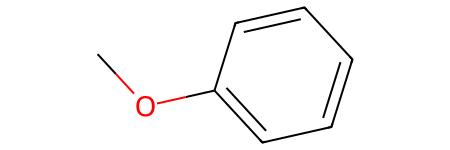

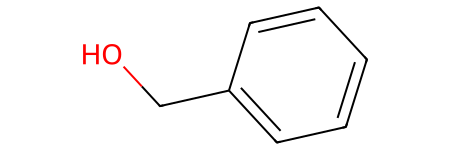

In [15]:
Chem.MolFromSmiles('C1=C(OC)C=CC=C1')
Chem.MolFromSmiles('C1=C(CO)C=CC=C1')

<div class="intro">

A ```Mol``` ```RDKit``` object has actually been created by calling ```Chem.MolFromSmiles```. It can be stored into a variable representing anisole. It seems quite convenient to call it ```anisole```. The value of this variable can be displayed in the notebook by typing its name and then running the cell. 
    
</div>

type of the anisole SMILES variable =  <class 'str'>
type of the anisole variable after call to Chem.MolFromSmiles =  <class 'rdkit.Chem.rdchem.Mol'>


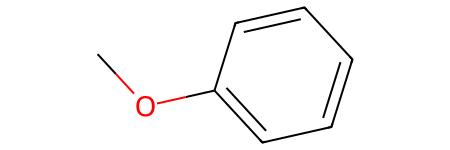

In [16]:
anisole = 'C1=C(OC)C=CC=C1'
print("type of the anisole SMILES variable = ",type(anisole)) #string format
anisoleMol = Chem.MolFromSmiles(anisole)
print("type of the anisole variable after call to Chem.MolFromSmiles = ",type(anisoleMol)) #rdkit Mol format
display(anisoleMol)

<div class="rqE">
    
The 3D mol format has nothing to do with the ```Mol``` type of RDKit objects
    
</div>

<div class="exE">

Define a `Mol RDKit` object that will contain the vitamin C molecule
</div>

In [ ]:
# Enter your code here


<div class="sol">

Want to see a possible answer? Uncomment the `# %load ./SolutionsToExercises/...` command below

</div>

In [ ]:
# %load ./SolutionsToExercises/Molecules/ascorbic.py

<div class="intro">

Visualization of the 3D compound. It will be seen that it can be done with `Chem.MolToMolBlock(SMILES_string)`
</div>

In [17]:
m = Chem.MolToMolBlock(anisoleMol)
mv = molView(m,'mol')

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

#### Canonicalization = Standardization

<div class="intro">
    
Different SMILES can represent the same molecule. This is a big problem in the context of cheminformatics, where you want unambiguous and unique compound descriptors. To do this, we can apply a canonicalization process. This concept refers to the generation of a unique SMILES for each molecule. We can use the ```MolToSmiles``` function in ```RDKit``` to get the SMILES of a ```Mol``` object. By default, ```RDKit``` canonicalizes the SMILES when applying this function.
    
</div>
<br>
<div class="rqE">
    
`MolToSmiles` returns a string 
    
</div>

initial SMILES =  C1=C(OC)C=CC=C1
canonicalized anisoleCan variable =  COc1ccccc1
type of the anisoleCan variable, i.e. after the call to Chem.MolFromSmiles =  <class 'rdkit.Chem.rdchem.Mol'>


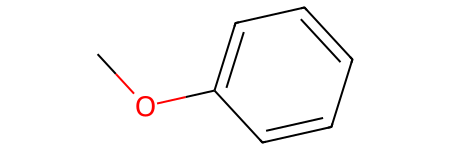

In [18]:
anisoleCan=Chem.MolToSmiles(anisoleMol)
print("initial SMILES = ",anisole)
print("canonicalized anisoleCan variable = ",anisoleCan) #is a string at this step 
anisoleCan = Chem.MolFromSmiles(anisoleCan)
print("type of the anisoleCan variable, i.e. after the call to Chem.MolFromSmiles = ",type(anisoleCan)) # it is now an RDKit Mol object
display(anisoleCan) #plot in 2D

<div class="rqE">
    
**There is no standard canonicalization**. The resulting SMILES will depend on the cheminformatics toolkit and the version that is used. If you want to perform a comparison/similarity/machine learning study using SMILES, you must first apply the same canonicalization process to ALL the molecules of interest.
    
</div>

#### Conversion from MDL Molfile to SMILES

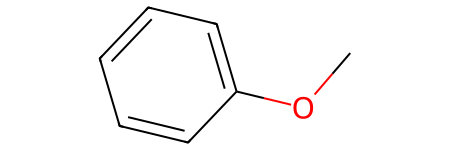

rdkit.Chem.rdchem.Mol

In [19]:
# reading of a mol file 
anisole = Chem.MolFromMolFile('./Molecules-data/anisole.mol')
anisole
# again, the Mol type of anisole has nothing to do with the MDL molfile format
type(anisole)

<div class="intro">
    
Single molecules can be converted to text using several functions present in the ```rdkit.Chem``` module
    
</div>

In [20]:
Chem.MolToSmiles(anisole)

'COc1ccccc1'

<div class="intro">
    
If you’d like to have the Kekule form of the SMILES, first Kekulize the molecule, then use the “kekuleSmiles” option    
</div>

'COC1=CC=CC=C1'

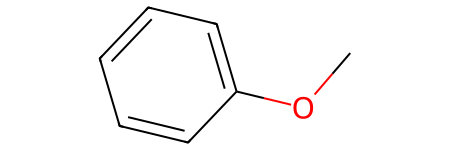

In [21]:
Chem.Kekulize(anisole)
Chem.MolToSmiles(anisole,kekuleSmiles=True)
# It changes nothing to the 2D drawing
anisole

#### Conversion from SMILES to MDL Mol format 

<div class="intro">

MDL Mol blocks are also available, but hydrogen atoms are not infered in the first place, it's only the skeleton that is expanded into a 3D space. Let's see that for cyclobutane:
</div>

In [22]:
cyclobutane = Chem.MolFromSmiles('C1CCC1')
print(Chem.MolToMolBlock(cyclobutane))


     RDKit          2D

  4  4  0  0  0  0  0  0  0  0999 V2000
    1.0607    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0000   -1.0607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0607    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    1.0607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  3  4  1  0
  4  1  1  0
M  END



<div class="intro">

To visualize it with the `molView()` class that actually uses the `py3Dmol` viewer widget, this MolFile format must be converted as a string
</div>

In [23]:
m = Chem.MolToMolBlock(cyclobutane)
mv = molView(m,'mol')

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

<div class="intro">

Now, add hydrogen atoms
</div>


     RDKit          2D

 12 12  0  0  0  0  0  0  0  0999 V2000
    1.0607    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0000   -1.0607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0607    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    1.0607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.1213    1.0607    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.1213   -1.0607    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    1.0607   -2.1213    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0607   -2.1213    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -2.1213   -1.0607    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -2.1213    1.0607    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0607    2.1213    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    1.0607    2.1213    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  3  4  1  0
  4  1  1  0
  1  5  1  0
  1  6  1  0
  2  7  1  0
  2 

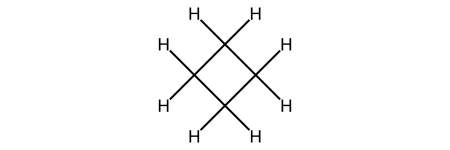

In [24]:
cyclobutaneH = Chem.AddHs(cyclobutane)
print(Chem.MolToMolBlock(cyclobutaneH))
cyclobutaneH

In [25]:
mH = Chem.MolToMolBlock(cyclobutaneH)
m = molView(mH,'mol')

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

<div class="rqE">
    
Cyclobutane is planar! It must be cleaned.
    
</div>

<div class="intro">

Cleaning of the structure, using the so-called ETKDG method. **This is not a geometry optimization based on the minimization of the energy of the molecule!**
</div>

0


     RDKit          3D

 12 12  0  0  0  0  0  0  0  0999 V2000
    0.4230    0.9562   -0.0573 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.9494   -0.4476    0.0775 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.4409   -0.9446   -0.1864 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.9600    0.4286    0.2195 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.8336    1.6583    0.6806 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.5192    1.3314   -1.1071 H   0  0  0  0  0  0  0  0  0  0  0  0
    1.6983   -0.6702   -0.7132 H   0  0  0  0  0  0  0  0  0  0  0  0
    1.3591   -0.7387    1.0506 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7635   -1.7281    0.5135 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.5819   -1.1411   -1.2610 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.7380    0.7914   -0.4921 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.2981    0.5045    1.2755 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  3  4  1  0
  4  1  1  0
  1  5  1  0
  1  6  1  0
  2  7  1  0
  2 

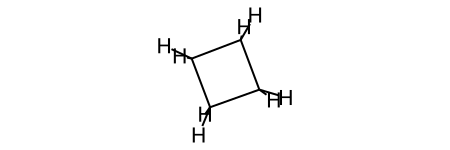

In [26]:
AllChem.EmbedMolecule(cyclobutaneH)
print(Chem.MolToMolBlock(cyclobutaneH))
cyclobutaneH

In [27]:
mHopt = Chem.MolToMolBlock(cyclobutaneH)
m = molView(mHopt,'mol')

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

<div class="rqE">
    
That's much better. In summary, it is possible, starting from a 2D SMILES coding, to end-up with a plausible 3D structure candidate.
    
</div>

<div class="exE">

Do the same to propose a possible 3D geometry for vitamin C. Print the mol3D coding and display it with the `molView()` tool
</div>

In [ ]:
# enter your code here



<div class="sol">

Want to see a possible answer? Uncomment the `# %load ./SolutionsToExercises/...` command below

</div>

In [28]:
# %load ./SolutionsToExercises/Molecules/ascorbic3D.py

### Playing with an RDKit Mol Object

<div class="intro">

An  `RDKit Mol` object is actually a graph representing the molecule. In this graph, vertices represents the atoms and edges the bonds in the molecule. Therefore, atoms and bonds can be retrieved from this object

</div>

In [30]:
anisole = 'C1=C(OC)C=CC=C1'
anisoleMol = Chem.MolFromSmiles(anisole)
anisoleCan = Chem.MolToSmiles(anisoleMol)
anisoleCan = Chem.MolFromSmiles(anisoleCan)

# standard way to copy molecules with rdkit
anisoleCanOrg = Chem.Mol(anisoleCan)
#Get total number of atoms
n_atoms = anisoleCan.GetNumAtoms()
print(f'Number of atoms: {n_atoms}')
#Get total number of sigma bonds, i.e. the sigma skeleton of the molecule
n_bonds = anisoleCan.GetNumBonds()
print(f'Number of sigma bonds: {n_bonds}')
print()

#create a list containing the atoms of the molecule
atoms = list(anisoleCan.GetAtoms())
#print the atomic number, atomicsymbol and hybridization for each atom in the molecule
for i,atom in enumerate(atoms):
    print(f"Atom {i:3}: {atom.GetAtomicNum():3d} {atom.GetSymbol():>2} {atom.GetHybridization()}")

Number of atoms: 8
Number of sigma bonds: 8

Atom   0:   6  C SP3
Atom   1:   8  O SP2
Atom   2:   6  C SP2
Atom   3:   6  C SP2
Atom   4:   6  C SP2
Atom   5:   6  C SP2
Atom   6:   6  C SP2
Atom   7:   6  C SP2


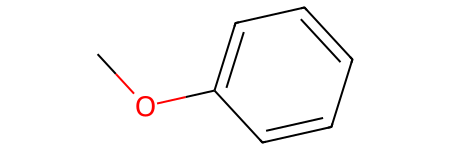

Bond   0:   0( C)-1( O), SINGLE 
Bond   1:   1( O)-2( C), SINGLE 
Bond   2:   2( C)-3( C), AROMATIC 
Bond   3:   3( C)-4( C), AROMATIC 
Bond   4:   4( C)-5( C), AROMATIC 
Bond   5:   5( C)-6( C), AROMATIC 
Bond   6:   6( C)-7( C), AROMATIC 
Bond   7:   7( C)-2( C), AROMATIC 


In [31]:
display(anisoleCan)
#create a list containing the bonds in the molecule
bonds = list(anisoleCan.GetBonds())
for i,bond in enumerate(bonds):
    print(f"Bond {i:3}: {bond.GetBeginAtomIdx():3}({bond.GetBeginAtom().GetSymbol():>2})-{bond.GetEndAtomIdx()}({bond.GetEndAtom().GetSymbol():>2}), {bond.GetBondType()} ")

### Substructure search and highlight

<div class="intro">

Atoms in a molecule can be highlighted by drawing a coloured solid or open circle around them, and bonds likewise can have a coloured outline applied. An obvious use is to show atoms and bonds that have matched a substructure query. The process in RDKit is based on [SMILES arbitrary target specification (SMARTS)](https://en.wikipedia.org/wiki/SMILES_arbitrary_target_specification), a language for describing molecular pattern.
    
Substructure searching, the process of finding a particular pattern (subgraph) in a molecule (graph), is one of the most important tasks for computers in chemistry. It is used in virtually every application that employs a digital representation of a molecule, including depiction (to highlight a particular functional group), drug design (searching a database for similar structures and activity), analytical chemistry (looking for previously-characterized structures and comparing their data to that of an unknown), and a host of other problems.

SMARTS is a language that allows you to specify substructures using rules that are straightforward extensions of SMILES. For example, to search a database for phenol-containing structures, one would use the SMARTS string [OH]c1ccccc1 ([introduction copied from daylight.com](https://www.daylight.com/dayhtml/doc/theory/theory.smarts.html))

</div>

In [ ]:
substructure = Chem.MolFromSmarts('c') #aromatic carbons
substructure
anisoleCan.HasSubstructMatch(substructure)
m = anisoleCan.GetSubstructMatches(substructure)
print(m)
anisoleCan

In [ ]:
substructure = Chem.MolFromSmarts('CO')  #CO, where is C is not aromatic
substructure
anisoleCan.HasSubstructMatch(substructure)
m = anisoleCan.GetSubstructMatches(substructure)
print(m)
anisoleCan

In [ ]:
substructure = Chem.MolFromSmarts('cO')  #CO, where is C is aromatic
substructure
anisoleCan.HasSubstructMatch(substructure)
m = anisoleCan.GetSubstructMatches(substructure)
print(m)
anisoleCan

In [ ]:
substructure = Chem.MolFromSmarts('[C,c]O')  #CO, where is C is aromatic or not
substructure
anisoleCan.HasSubstructMatch(substructure)
m = anisoleCan.GetSubstructMatches(substructure)
print(m)
anisoleCan

### Morgan fingerprints


<div class="intro">

ML algorithms usually take vectors as inputs and operate with them. 3D or 2D descriptors must be put into a vector form, without loosing their meaning. It is the case with molecules. How can we transform them into numbers to feed our ML algorithms?

One common option is using molecular fingerprints. We will use here the so-called Morgan Fingerprint, that describes molecules as bit arrays (arrays of 1s and 0s).
    
The bits correspond to the circular environments of each atom in a molecule. The number of neighboring bonds and atoms to consider is set by the radius
    
</div>

In [32]:
import numpy as np
import rdkit
from rdkit import Chem
from rdkit.Chem import (
    AllChem,
    PandasTools,
    Draw,
    Descriptors,
    MACCSkeys,
    rdFingerprintGenerator,
)

mfpgen = rdFingerprintGenerator.GetMorganGenerator(radius=3,fpSize=2048,includeChirality=True)

anisoleMol = Chem.MolFromSmiles('COC1=CC=CC=C1')
print("type of anisoleMol variable = ",type(anisoleMol))
anisoleFp = mfpgen.GetFingerprint(anisoleMol)
print(anisoleFp.GetNumBits()) #print vector length

anisoleFPL = anisoleFp.ToList() #visualize vector as list.
print(anisoleFPL)
print(F"{fg.BLUE}non-zero bits = {hl.BOLD}{np.nonzero(anisoleFp)}{fg.OFF}")

type of anisoleMol variable =  <class 'rdkit.Chem.rdchem.Mol'>
2048
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

<div class="rq">
    
A Morgan fingerprint is sparse. Let's illustrate this visually, like a kind of **barcode**.
    
</div>

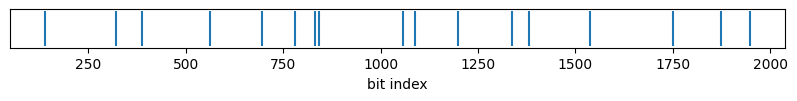

In [33]:
from matplotlib import pyplot as plt
_ = plt.figure(figsize=(10,0.5))
_ = plt.vlines(
    [i for i, fp in enumerate(anisoleFPL) if fp > 0.5], ymin=0, ymax=1
)
_ = plt.xlabel("bit index")
_ = plt.yticks([])
_ = plt.show()

<div class="rq">
    
The canonicalized SMILES of anisole is now available as a 1D vector fingerprint, that can be used as an input vector in an ML framework.
    
</div>

<div class="introT" title="Do these bits have a meaning?">

Yes, let's plot their chemical counterpart. **NB** We are going to use `GetMorganFingerprintAsBitVect()`, a deprecated function 
</div>

2048
non-zero bits = (array([ 140,  322,  389,  562,  695,  781,  831,  841, 1057, 1088, 1199,
       1336, 1380, 1536, 1750, 1873, 1947]),)


[15:49:32] DEPRECATION WARNING: please use MorganGenerator


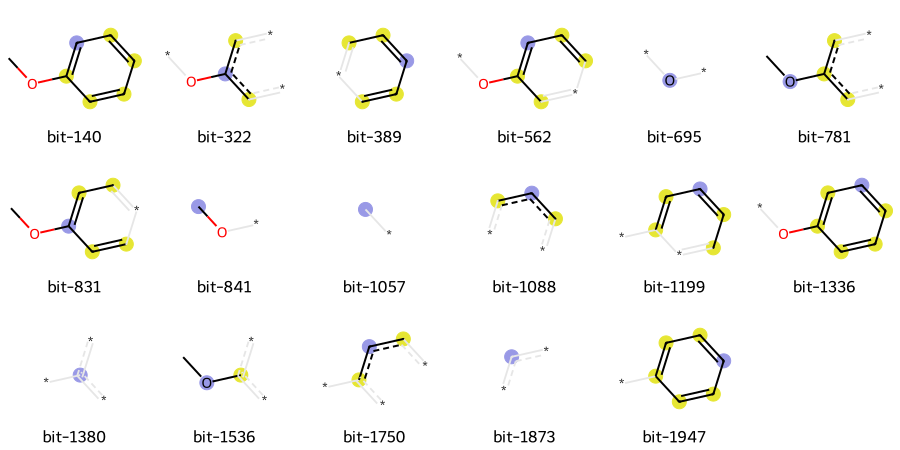

In [34]:
bit={}
anisoleFp = AllChem.GetMorganFingerprintAsBitVect(anisoleMol, radius=3, nBits=2048, useChirality=True, bitInfo=bit) #nBits is the number of bits (length) of the fingerprint
print(anisoleFp.GetNumBits()) #print vector length

anisoleFPL = anisoleFp.ToList() #visualize vector as list.
print(F"{fg.BLUE}non-zero bits = {hl.BOLD}{np.nonzero(anisoleFp)}{fg.OFF}")

list_bits = [(anisoleMol, x, bit) for x in anisoleFp.GetOnBits()]
legends = [f"bit-{str(x)}" for x in anisoleFp.GetOnBits()]
Draw.DrawMorganBits(list_bits, molsPerRow=6,legends=legends)   

<div class="rqT" title = "Default highlight colors for the Morgan bits:">

- blue: the central atom in the environment
- yellow: aromatic atoms
- gray: aliphatic ring atoms
</div>

<div class="exE">

Visualize the 2048-bits Morgan fingerprint of the canonicalized vitamin C (radius = 3Å)
</div>

In [36]:
# enter your code here

<div class="sol">

Want to see a possible answer? Uncomment the `# %load ./SolutionsToExercises/...` command below

</div>

In [ ]:
# %load ./SolutionsToExercises/Molecules/ascorbicMFP.py

### Reading and using molecular databases with SMILES encoding, using pandas

<div class="intro">

*En route* toward data science and machine learning, thanks to the coupling between ```RDKit``` and ```pandas```! We will use a csv file that contains organic molecules and several data, mainly obtained from quantum chemistry calculations (DFT/B3LYP/6-31G(2df,p)). It is a small selection of the [GDB-9 134k molecules database](https://datarepository.wolframcloud.com/resources/GDB9-Database/), aiming at benchmarking existing methods, developing new methods, such as hybrid quantum mechanics/machine learning, and systematic identifying structure-property relationships ([doi: 10.1038/sdata.2014.22](https://www.nature.com/articles/sdata201422)).
    
Importing ```pandasTools``` enables several features that allow for using RDKit molecules as columns of a Pandas dataframe
</div>

In [37]:
from rdkit.Chem import PandasTools
import pandas as pd

#### Read the database

In [44]:
df = pd.read_csv('./Molecules-data/dsgdb9-299xtr.csv',sep="\t")
display(df)
df.count()
display(df.describe().style.format("{0:.2f}"))

dsgdb9 ID symmetry point group   composition  mu / D  alpha / bohr^3  \
0        82308                   C1     C8 N1 H15  1.4253           87.43   
1        21686                   C1   N2 C5 O1 H4  2.8250           64.94   
2        66343                   C1     O2 C7 H10  2.8472           78.03   
3        38467                   C1   C7 O1 N1 H9  1.3657           75.34   
4        36951                   C1     C7 O2 H12  0.0153           78.04   
..         ...                  ...           ...     ...             ...   
294     128341                   C2      C4 N5 H9  1.4142           76.46   
295      36698                   C1      N3 C6 H9  5.6677           77.11   
296      56318                   C1     C6 O3 H10  5.9204           74.71   
297      52249                   C1  O1 C7 N1 H11  3.6826           79.28   
298     105360                   C1      O3 C6 H8  3.1133           68.26   

     E(HOMO) / eV  E(LUMO) / eV  chemical hardness / eV  zpve / eV  \
0       -6.019159      2.062623                8.081782   5.929987   
1       -6.386512     -0.598650                5.787862   2.286001   
2       -6.745703     -1.131994                5.613709   4.336978   
3       -6.253177      0.691169                6.944346   4.082361   
4       -6.710328      1.814999                8.525327   4.978378   
..            ...           ...                     ...        ...   
294     -5.036828      0.612256                5.649084   4.061191   
295     -6.421887      0.772803                7.194691   4.056891   
296     -6.979721     -0.574160                6.405560   4.226364   
297     -6.636857      0.887091                7.523948   4.681338   
298     -7.053191     -1.159205                5.893986   3.658516   

     U(0K) / kcal.mol-1  U(298.15K) / kcal.mol-1  H(298.15K) / kcal.mol-1  \
0        -231177.406281           -231171.633194           -231171.040198   
1        -236875.947200           -236871.580989           -236870.988620   
2        -265470.537995           -265465.252483           -265464.660114   
3        -252109.268673           -252105.556327           -252104.963958   
4        -266174.183821           -266168.487290           -266167.894921   
..                  ...                      ...                      ...   
294      -270731.361562           -270725.306723           -270724.714354   
295      -249797.873293           -249792.641747           -249792.049378   
296      -288785.425973           -288778.697816           -288778.105447   
297      -252976.147284           -252970.682304           -252970.089935   
298      -287976.920176           -287971.707455           -287971.115086   

     G(298.15K) / kcal.mol-1  Cv(298.15K) / cal.mol-1.K-1  \
0             -231198.053226                       37.154   
1             -236895.374266                       26.304   
2             -265491.231375                       32.593   
3             -252127.942728                       26.543   
4             -266196.928529                       31.794   
..                       ...                          ...   
294           -270753.497586                       33.428   
295           -249819.110724                       30.898   
296           -288809.836719                       35.355   
297           -252997.781300                       32.422   
298           -287997.636774                       31.063   

            SMILES BASIC                          SMILES STEREO  \
0        CC1N2CC2CC1(C)C                C[C@H]1N2C[C@H]2CC1(C)C   
1          NC1=NOC=C1C#C                            Nc1nocc1C#C   
2        OC1(CCCC=C1)C=O                     O[C@]1(CCCC=C1)C=O   
3    C1C2OC34CN(C3)C1C24  C1[C@H]2O[C@@]34CN(C3)[C@@H]1[C@@H]24   
4        C(C1COC1)C1COC1                        C(C1COC1)C1COC1   
..                   ...                                    ...   
294        CNC1=NNN=C1NC                         CNc1n[nH]nc1NC   
295       N#CCNC1CC2NC12            N#CCN[C@H

dsgdb9 ID                      299
symmetry point group           299
composition                    299
mu / D                         299
alpha / bohr^3                 299
E(HOMO) / eV                   299
E(LUMO) / eV                   299
chemical hardness / eV         299
zpve / eV                      299
U(0K) / kcal.mol-1             299
U(298.15K) / kcal.mol-1        299
H(298.15K) / kcal.mol-1        299
G(298.15K) / kcal.mol-1        299
Cv(298.15K) / cal.mol-1.K-1    299
SMILES BASIC                   299
SMILES STEREO                  299
InChi1                         299
InChi2                         299
dtype: int64

#### Create new columns with RDKit objects or properties

<div class="intro">

A new column can be created holding the respective RDKit molecule objects. Fingerprints can be included to accelerate substructure searches on the dataframe. The 'SMILES BASIC' data in the df dataframe will be converted into  ```mol``` objects that can be processed by RDKit. You can do this using the ```PandasTools.AddMoleculeColumnToFrame``` function.
    
But we will first apply the same canonicalization operation to all the examples we have in the dataframe, using the aptly named ```apply()``` function.
</div>

In [45]:
def canonicalize_smiles(smiles):
    '''This function takes a non-canonical SMILES and returns the canonical version
    
    Args: 
        -smiles: str, non-canonical SMILES of a molecule
    
    Out:
        - canonical_smiles: str, canonical SMILES of the molecule
    '''
    
    mol = Chem.MolFromSmiles(smiles) #create a mol object from input smiles.
    can = Chem.MolToSmiles(mol) #convert the previous mol object to SMILES. By default, RDKit canonicalizes the SMILES when applying this MolToSmiles() function

    return can

df['CANONICAL SMILES BASIC'] = df['SMILES BASIC'].apply(canonicalize_smiles)
display(df)

dsgdb9 ID symmetry point group   composition  mu / D  alpha / bohr^3  \
0        82308                   C1     C8 N1 H15  1.4253           87.43   
1        21686                   C1   N2 C5 O1 H4  2.8250           64.94   
2        66343                   C1     O2 C7 H10  2.8472           78.03   
3        38467                   C1   C7 O1 N1 H9  1.3657           75.34   
4        36951                   C1     C7 O2 H12  0.0153           78.04   
..         ...                  ...           ...     ...             ...   
294     128341                   C2      C4 N5 H9  1.4142           76.46   
295      36698                   C1      N3 C6 H9  5.6677           77.11   
296      56318                   C1     C6 O3 H10  5.9204           74.71   
297      52249                   C1  O1 C7 N1 H11  3.6826           79.28   
298     105360                   C1      O3 C6 H8  3.1133           68.26   

     E(HOMO) / eV  E(LUMO) / eV  chemical hardness / eV  zpve / eV  \
0       -6.019159      2.062623                8.081782   5.929987   
1       -6.386512     -0.598650                5.787862   2.286001   
2       -6.745703     -1.131994                5.613709   4.336978   
3       -6.253177      0.691169                6.944346   4.082361   
4       -6.710328      1.814999                8.525327   4.978378   
..            ...           ...                     ...        ...   
294     -5.036828      0.612256                5.649084   4.061191   
295     -6.421887      0.772803                7.194691   4.056891   
296     -6.979721     -0.574160                6.405560   4.226364   
297     -6.636857      0.887091                7.523948   4.681338   
298     -7.053191     -1.159205                5.893986   3.658516   

     U(0K) / kcal.mol-1  U(298.15K) / kcal.mol-1  H(298.15K) / kcal.mol-1  \
0        -231177.406281           -231171.633194           -231171.040198   
1        -236875.947200           -236871.580989           -236870.988620   
2        -265470.537995           -265465.252483           -265464.660114   
3        -252109.268673           -252105.556327           -252104.963958   
4        -266174.183821           -266168.487290           -266167.894921   
..                  ...                      ...                      ...   
294      -270731.361562           -270725.306723           -270724.714354   
295      -249797.873293           -249792.641747           -249792.049378   
296      -288785.425973           -288778.697816           -288778.105447   
297      -252976.147284           -252970.682304           -252970.089935   
298      -287976.920176           -287971.707455           -287971.115086   

     G(298.15K) / kcal.mol-1  Cv(298.15K) / cal.mol-1.K-1  \
0             -231198.053226                       37.154   
1             -236895.374266                       26.304   
2             -265491.231375                       32.593   
3             -252127.942728                       26.543   
4             -266196.928529                       31.794   
..                       ...                          ...   
294           -270753.497586                       33.428   
295           -249819.110724                       30.898   
296           -288809.836719                       35.355   
297           -252997.781300                       32.422   
298           -287997.636774                       31.063   

            SMILES BASIC                          SMILES STEREO  \
0        CC1N2CC2CC1(C)C                C[C@H]1N2C[C@H]2CC1(C)C   
1          NC1=NOC=C1C#C                            Nc1nocc1C#C   
2        OC1(CCCC=C1)C=O                     O[C@]1(CCCC=C1)C=O   
3    C1C2OC34CN(C3)C1C24  C1[C@H]2O[C@@]34CN(C3)[C@@H]1[C@@H]24   
4        C(C1COC1)C1COC1                        C(C1COC1)C1COC1   
..                   ...                                    ...   
294        CNC1=NNN=C1NC                         CNc1n[nH]nc1NC   
295       N#CCNC1CC2NC12            N#CCN[C@H

dsgdb9 ID                                          Molecule  \
0        82308  <rdkit.Chem.rdchem.Mol object at 0x7f93f8239d20>   
1        21686  <rdkit.Chem.rdchem.Mol object at 0x7f93f8239c40>   
2        66343  <rdkit.Chem.rdchem.Mol object at 0x7f93f8239b60>   
3        38467  <rdkit.Chem.rdchem.Mol object at 0x7f93f8239a80>   
4        36951  <rdkit.Chem.rdchem.Mol object at 0x7f93f82399a0>   
..         ...                                               ...   
294     128341  <rdkit.Chem.rdchem.Mol object at 0x7f93f8252c70>   
295      36698  <rdkit.Chem.rdchem.Mol object at 0x7f93f8252d50>   
296      56318  <rdkit.Chem.rdchem.Mol object at 0x7f93f8252e30>   
297      52249  <rdkit.Chem.rdchem.Mol object at 0x7f93f8252f10>   
298     105360  <rdkit.Chem.rdchem.Mol object at 0x7f93f8252ff0>   

    symmetry point group   composition  mu / D  alpha / bohr^3  E(HOMO) / eV  \
0                     C1     C8 N1 H15  1.4253           87.43     -6.019159   
1                     C1   N2 C5 O1 H4  2.8250           64.94     -6.386512   
2                     C1     O2 C7 H10  2.8472           78.03     -6.745703   
3                     C1   C7 O1 N1 H9  1.3657           75.34     -6.253177   
4                     C1     C7 O2 H12  0.0153           78.04     -6.710328   
..                   ...           ...     ...             ...           ...   
294                   C2      C4 N5 H9  1.4142           76.46     -5.036828   
295                   C1      N3 C6 H9  5.6677           77.11     -6.421887   
296                   C1     C6 O3 H10  5.9204           74.71     -6.979721   
297                   C1  O1 C7 N1 H11  3.6826           79.28     -6.636857   
298                   C1      O3 C6 H8  3.1133           68.26     -7.053191   

     E(LUMO) / eV  chemical hardness / eV  zpve / eV  U(0K) / kcal.mol-1  \
0        2.062623                8.081782   5.929987      -231177.406281   
1       -0.598650                5.787862   2.286001      -236875.947200   
2       -1.131994                5.613709   4.336978      -265470.537995   
3        0.691169                6.944346   4.082361      -252109.268673   
4        1.814999                8.525327   4.978378      -266174.183821   
..            ...                     ...        ...                 ...   
294      0.612256                5.649084   4.061191      -270731.361562   
295      0.772803                7.194691   4.056891      -249797.873293   
296     -0.574160                6.405560   4.226364      -288785.425973   
297      0.887091                7.523948   4.681338      -252976.147284   
298     -1.159205                5.893986   3.658516      -287976.920176   

     U(298.15K) / kcal.mol-1  H(298.15K) / kcal.mol-1  \
0             -231171.633194           -231171.040198   
1             -236871.580989           -236870.988620   
2             -265465.252483           -265464.660114   
3             -252105.556327           -252104.963958   
4             -266168.487290           -266167.894921   
..                       ...                      ...   
294           -270725.306723           -270724.714354   
295           -249792.641747           -249792.049378   
296           -288778.697816           -288778.105447   
297           -252970.682304           -252970.089935   
298           -287971.707455           -287971.115086   

     G(298.15K) / kcal.mol-1  Cv(298.15K) / cal.mol-1.K-1  \
0             -231198.053226                       37.154   
1             -236895.374266                       26.304   
2             -265491.231375                       32.593   
3             -252127.942728                       26.543   
4             -266196.928529                       31.794   
..                       ...                          ...   
294           -270753.497586                       33.428   
295           -249819.110724                       30.898   
296           -288809.836719                       35.355   
297           -2529
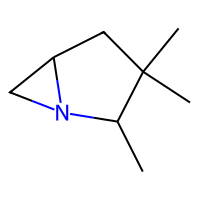
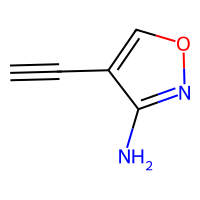
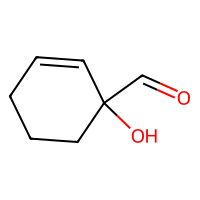
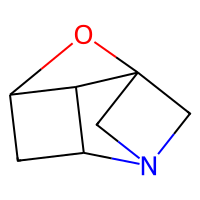
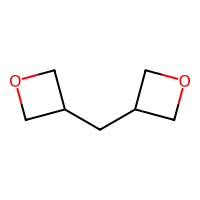
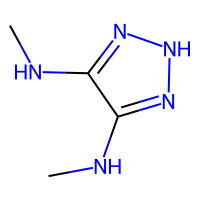
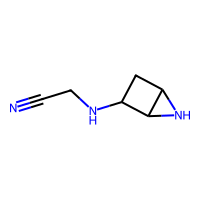
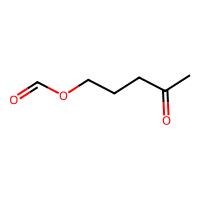
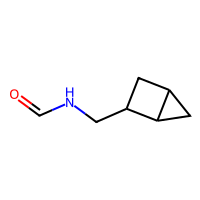
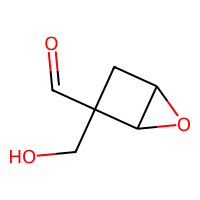

In [46]:
df2=df.copy()
PandasTools.AddMoleculeColumnToFrame(df2, smilesCol='SMILES BASIC',includeFingerprints=True,molCol='Molecule') #inserted as the last column
df2.insert(1, 'Molecule', df2.pop('Molecule')) #move after column 1
display(df2)

<div class="intro">

We will now use the `apply()` function of Pandas to compute the molecular weight of all our molecules. This function takes a `mol` object as input and returns its molecular weight.
</div>

dsgdb9 ID                                          Molecule  \
0        82308  <rdkit.Chem.rdchem.Mol object at 0x7f93f8239d20>   
1        21686  <rdkit.Chem.rdchem.Mol object at 0x7f93f8239c40>   
2        66343  <rdkit.Chem.rdchem.Mol object at 0x7f93f8239b60>   
3        38467  <rdkit.Chem.rdchem.Mol object at 0x7f93f8239a80>   
4        36951  <rdkit.Chem.rdchem.Mol object at 0x7f93f82399a0>   
..         ...                                               ...   
294     128341  <rdkit.Chem.rdchem.Mol object at 0x7f93f8252c70>   
295      36698  <rdkit.Chem.rdchem.Mol object at 0x7f93f8252d50>   
296      56318  <rdkit.Chem.rdchem.Mol object at 0x7f93f8252e30>   
297      52249  <rdkit.Chem.rdchem.Mol object at 0x7f93f8252f10>   
298     105360  <rdkit.Chem.rdchem.Mol object at 0x7f93f8252ff0>   

    symmetry point group   composition  MW / Da  mu / D  alpha / bohr^3  \
0                     C1     C8 N1 H15  125.215  1.4253           87.43   
1                     C1   N2 C5 O1 H4  108.100  2.8250           64.94   
2                     C1     O2 C7 H10  126.155  2.8472           78.03   
3                     C1   C7 O1 N1 H9  123.155  1.3657           75.34   
4                     C1     C7 O2 H12  128.171  0.0153           78.04   
..                   ...           ...      ...     ...             ...   
294                   C2      C4 N5 H9  127.151  1.4142           76.46   
295                   C1      N3 C6 H9  123.159  5.6677           77.11   
296                   C1     C6 O3 H10  130.143  5.9204           74.71   
297                   C1  O1 C7 N1 H11  125.171  3.6826           79.28   
298                   C1      O3 C6 H8  128.127  3.1133           68.26   

     E(HOMO) / eV  E(LUMO) / eV  chemical hardness / eV  ...  \
0       -6.019159      2.062623                8.081782  ...   
1       -6.386512     -0.598650                5.787862  ...   
2       -6.745703     -1.131994                5.613709  ...   
3       -6.253177      0.691169                6.944346  ...   
4       -6.710328      1.814999                8.525327  ...   
..            ...           ...                     ...  ...   
294     -5.036828      0.612256                5.649084  ...   
295     -6.421887      0.772803                7.194691  ...   
296     -6.979721     -0.574160                6.405560  ...   
297     -6.636857      0.887091                7.523948  ...   
298     -7.053191     -1.159205                5.893986  ...   

     U(0K) / kcal.mol-1  U(298.15K) / kcal.mol-1  H(298.15K) / kcal.mol-1  \
0        -231177.406281           -231171.633194           -231171.040198   
1        -236875.947200           -236871.580989           -236870.988620   
2        -265470.537995           -265465.252483           -265464.660114   
3        -252109.268673           -252105.556327           -252104.963958   
4        -266174.183821           -266168.487290           -266167.894921   
..                  ...                      ...                      ...   
294      -270731.361562           -270725.306723           -270724.714354   
295      -249797.873293           -249792.641747           -249792.049378   
296      -288785.425973           -288778.697816           -288778.105447   
297      -252976.147284           -252970.682304           -252970.089935   
298      -287976.920176           -287971.707455           -287971.115086   

     G(298.15K) / kcal.mol-1  Cv(298.15K) / cal.mol-1.K-1  \
0             -231198.053226                       37.154   
1             -236895.374266                       26.304   
2             -265491.231375                       32.593   
3             -252127.942728                       26.543   
4             -266196.928529                       31.794   
..                       ...                          ...   
294           -270753.497586                       33.428   
295           -249819.110724                       30.898   
296           -288809.836719                
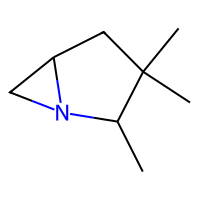
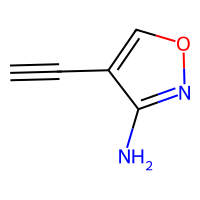
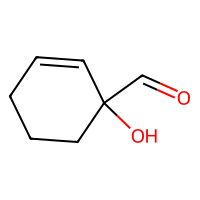
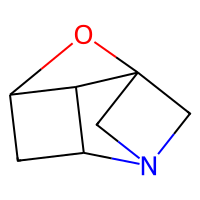
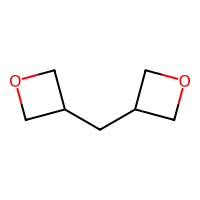
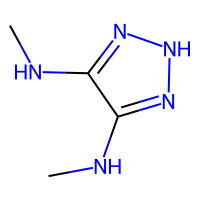
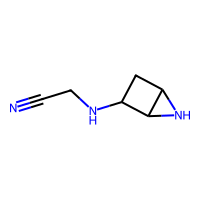
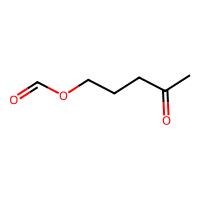
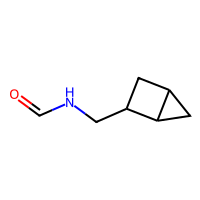
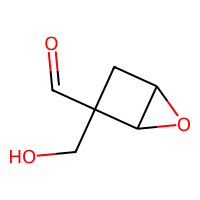

In [47]:
from rdkit.Chem.Descriptors import MolWt
df2['MW / Da'] = df2['Molecule'].apply(MolWt)
df2.insert(4, 'MW / Da', df2.pop('MW / Da')) #move after column 4
display(df2)

<div class="intro">

Let's add other descriptors, such as the number of hydrogen bond donor (`HBD`) and acceptors (`HBA`) in a molecule.
</div>

dsgdb9 ID                                          Molecule  \
0        82308  <rdkit.Chem.rdchem.Mol object at 0x7f93f8239d20>   
1        21686  <rdkit.Chem.rdchem.Mol object at 0x7f93f8239c40>   
2        66343  <rdkit.Chem.rdchem.Mol object at 0x7f93f8239b60>   
3        38467  <rdkit.Chem.rdchem.Mol object at 0x7f93f8239a80>   
4        36951  <rdkit.Chem.rdchem.Mol object at 0x7f93f82399a0>   
..         ...                                               ...   
294     128341  <rdkit.Chem.rdchem.Mol object at 0x7f93f8252c70>   
295      36698  <rdkit.Chem.rdchem.Mol object at 0x7f93f8252d50>   
296      56318  <rdkit.Chem.rdchem.Mol object at 0x7f93f8252e30>   
297      52249  <rdkit.Chem.rdchem.Mol object at 0x7f93f8252f10>   
298     105360  <rdkit.Chem.rdchem.Mol object at 0x7f93f8252ff0>   

    symmetry point group   composition  MW / Da  HBA  HBD  mu / D  \
0                     C1     C8 N1 H15  125.215    1    0  1.4253   
1                     C1   N2 C5 O1 H4  108.100    3    1  2.8250   
2                     C1     O2 C7 H10  126.155    2    1  2.8472   
3                     C1   C7 O1 N1 H9  123.155    2    0  1.3657   
4                     C1     C7 O2 H12  128.171    2    0  0.0153   
..                   ...           ...      ...  ...  ...     ...   
294                   C2      C4 N5 H9  127.151    4    3  1.4142   
295                   C1      N3 C6 H9  123.159    3    2  5.6677   
296                   C1     C6 O3 H10  130.143    3    0  5.9204   
297                   C1  O1 C7 N1 H11  125.171    1    1  3.6826   
298                   C1      O3 C6 H8  128.127    3    1  3.1133   

     alpha / bohr^3  E(HOMO) / eV  ...  U(0K) / kcal.mol-1  \
0             87.43     -6.019159  ...      -231177.406281   
1             64.94     -6.386512  ...      -236875.947200   
2             78.03     -6.745703  ...      -265470.537995   
3             75.34     -6.253177  ...      -252109.268673   
4             78.04     -6.710328  ...      -266174.183821   
..              ...           ...  ...                 ...   
294           76.46     -5.036828  ...      -270731.361562   
295           77.11     -6.421887  ...      -249797.873293   
296           74.71     -6.979721  ...      -288785.425973   
297           79.28     -6.636857  ...      -252976.147284   
298           68.26     -7.053191  ...      -287976.920176   

     U(298.15K) / kcal.mol-1  H(298.15K) / kcal.mol-1  \
0             -231171.633194           -231171.040198   
1             -236871.580989           -236870.988620   
2             -265465.252483           -265464.660114   
3             -252105.556327           -252104.963958   
4             -266168.487290           -266167.894921   
..                       ...                      ...   
294           -270725.306723           -270724.714354   
295           -249792.641747           -249792.049378   
296           -288778.697816           -288778.105447   
297           -252970.682304           -252970.089935   
298           -287971.707455           -287971.115086   

     G(298.15K) / kcal.mol-1  Cv(298.15K) / cal.mol-1.K-1  \
0             -231198.053226                       37.154   
1             -236895.374266                       26.304   
2             -265491.231375                       32.593   
3             -252127.942728                       26.543   
4             -266196.928529                       31.794   
..                       ...                          ...   
294           -270753.497586                       33.428   
295           -249819.110724                       30.898   
296           -288809.836719                       35.355   
297           -252997.781300                       32.422   
298           -287997.636774                       31.063   

            SMILES BASIC                          SMILES STEREO  \
0        CC1N2CC2CC1(C)C                C[C@H]1N2C[C@H]2CC1(C)C   
1          NC1=NOC=C1C#C                            Nc1nocc1C#
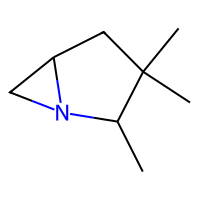
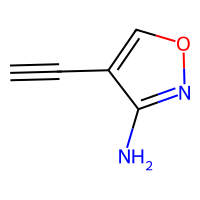
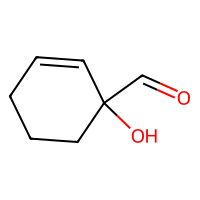
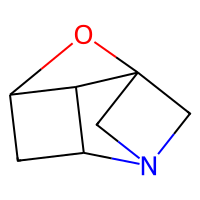
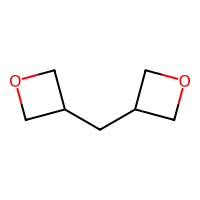
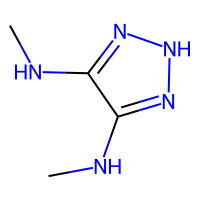
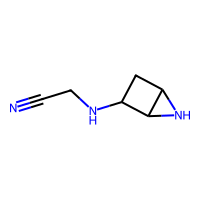
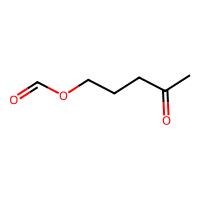
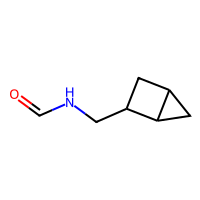
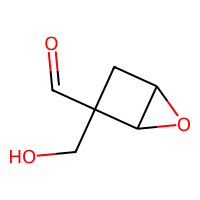

In [48]:
from rdkit.Chem.rdMolDescriptors import CalcNumHBA, CalcNumHBD
df2['HBA'] = df2['Molecule'].apply(Chem.AddHs)
df2['HBD'] = df2['Molecule'].apply(Chem.AddHs)
df2['HBA'] = df2['HBA'].apply(CalcNumHBA)
df2['HBD'] = df2['HBD'].apply(CalcNumHBD)
df2.insert(5, 'HBA', df2.pop('HBA')) #move after column 5
df2.insert(6, 'HBD', df2.pop('HBD')) #move after column 6
display(df2)

#### Visualize the molecules in a grid, together with some properties

In [50]:
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.bondLineWidth=2
#FrameToGridImage: Draw grid image of mols in pandas DataFrame
PandasTools.FrameToGridImage(df2, molsPerRow=3, column='Molecule',legends=[
        f"{molecule['dsgdb9 ID']}: {molecule['MW / Da']:.2f} Da. HB {molecule['HBD']}D:{molecule['HBA']}A"
        for index, molecule in df2.iterrows()],
        useSVG=True, subImgSize=(400, 200), maxMols=df2.shape[0])

#### Select molecules that match a pattern and visualize them on a grid 

<div class="intro">

The substructure will be given as a SMARTS ([see examples on the Daylight website](https://www.daylight.com/dayhtml_tutorials/languages/smarts/smarts_examples.html))

We will search for ketones. A carbonyl group can be simply identified by `[CX3]=[OX1]` (a carbon that has exactly three connections is double bonded to an oxygen atom that has a single connection). But it hits  carboxylic acid, ester, ketone, aldehyde, carbonic acid/ester,anhydride, carbamic acid/ester, acyl halide, amide.

This is why the SMARTS for ketones is `[#6][CX3](=O)[#6]`
- [CX3] = C with exactly 3 connections
- [#6] carbon atom
- (=O) oxygen involved in a double bond

</div>

In [ ]:
substructure = Chem.MolFromSmarts('[#6][CX3](=O)[#6]') #N-containing compounds
df2['ketone'] = df2['Molecule'].apply(lambda x: x.HasSubstructMatch(substructure))
df2.insert(2, 'ketone', df2.pop('ketone')) #move after column 2
display(df2)

<div class="rqT" title="There is trick right here">

A very important one: how to save an svg file
</div>

In [ ]:
print(f"There are {df2.loc[df2['ketone']].shape[0]} molecules containing at least one ketone group")

svg = PandasTools.FrameToGridImage(df2.loc[df2['ketone']], molsPerRow=3, column='Molecule',legends=[
        f"{molecule['dsgdb9 ID']}: {molecule['MW']:.2f} Da. HB {molecule['HBD']}D:{molecule['HBA']}A"
        for index, molecule in df2.iterrows()],
        useSVG=True, subImgSize=(400, 200), maxMols=df2.loc[df2['ketone']].shape[0])

display(svg)

open('FiguresCreatedInNotebooks/rdkit/MoleculesWithKetones.svg', 'w').write(svg.data)

## Chemical (or molecular) similarity visualized as a heatmap

<div class="intro">

[Chemical similarity](https://en.wikipedia.org/wiki/Chemical_similarity) refers to the similarity of chemical elements, molecules or chemical compounds with respect to either structural or functional qualities. It is often described as an inverse of a measure of distance in descriptor space. The most popular similarity measure for comparing chemical structures represented by means of fingerprints is the **Tanimoto** (or Jaccard) coefficient *T*. Two structures are usually considered similar if *T* > 0.85. Let's enter into more details.

**Similarity measures**, calculations that quantify the similarity of two molecules, and screening, a way of rapidly eliminating molecules as candidates in a substructure search, are both processes that use **fingerprints**. Fingerprints are a very abstract representation of certain **structural features** of a molecule. Structure in a broad sense, it can be either 3D coordinates or the identification of chemical groups.

**Structural keys** were the first type of screen employed for high-speed screening of chemical databases. A structural key is usually represented as a boolean array. It is a bitmap in which each bit represents the presence (TRUE) or absence (FALSE) of a specific **structural feature**.

**Structural keys suffer from a lack of generality**. The choice of patterns depends on the nature of the queries to be made: A structural key used by a group of pharmaceutical researchers might be nearly worthless to a group of petrochemical researchers. **Fingerprints** address this lack of generality by eliminating the idea of pre-defined patterns

---

A **fingerprint** is a boolean array, or bitmap, but unlike a structural key there is no assigned meaning to each bit. Your own fingerprint is very characteristic of you, yet there is no meaning to any particular feature. Similarly, a pattern's fingerprint characterizes the pattern, but **the meaning of any particular bit is not well defined**. 
Unlike a structural key with its pre-defined patterns, the patterns for a molecule's fingerprint are generated from the molecule itself. The fingerprinting algorithm examines the molecule and generates the following:

- a pattern for each atom
- a pattern representing each atom and its nearest neighbors (plus the bonds that join them)
- a pattern representing each group of atoms and bonds connected by paths up to 2 bonds long
- ... atoms and bonds connected by paths up to 3 bonds long
- ... continuing....

**For example, the molecule OC=CN would generate the following patterns**:

- 0-bond paths:	  C	  O	  N
- 1-bond paths:	  OC	  C=C	  CN
- 2-bond paths:	  OC=C	  C=CN	
- 3-bond paths:	  OC=CN	

---

**Fingerprints allow to evaluate the structural similarity between two compounds**. Another approach would consist in ranking them according to the number of physical properties and reactions they share. Fingerprints effectively encode the substructures present in a molecule. It would not seem unreasonable that the proportion of substructures in common between two molecules should be a reasonable measure of similarity of the overall molecules. In mathematical terms this is a comparison of the bits in the fingerprints which are set on. Let's define a, b, c, and d as:
- a is the count of non-zero bits on in system A but not in system B
- b is the count of non-zero bits on in system B but not in system A
- c is the count of the non-zero bits on in both system A and system B
- d is the count of the bits off in both system A and system B

The popular so-called **Tanimoto (or Jaccard) similarity coefficient** is calculated as:
$$\frac{c}{a+b+c}$$
It may be regarded as the proportion of the "on-bits" which are shared.

</div>

### Read the database

We will play with a reduced subset of 25 compounds

dsgdb9 ID                      25
symmetry point group           25
composition                    25
mu / D                         25
alpha / bohr^3                 25
E(HOMO) / eV                   25
E(LUMO) / eV                   25
chemical hardness / eV         25
zpve / eV                      25
U(0K) / kcal.mol-1             25
U(298.15K) / kcal.mol-1        25
H(298.15K) / kcal.mol-1        25
G(298.15K) / kcal.mol-1        25
Cv(298.15K) / cal.mol-1.K-1    25
SMILES BASIC                   25
SMILES STEREO                  25
InChi1                         25
InChi2                         25
dtype: int64

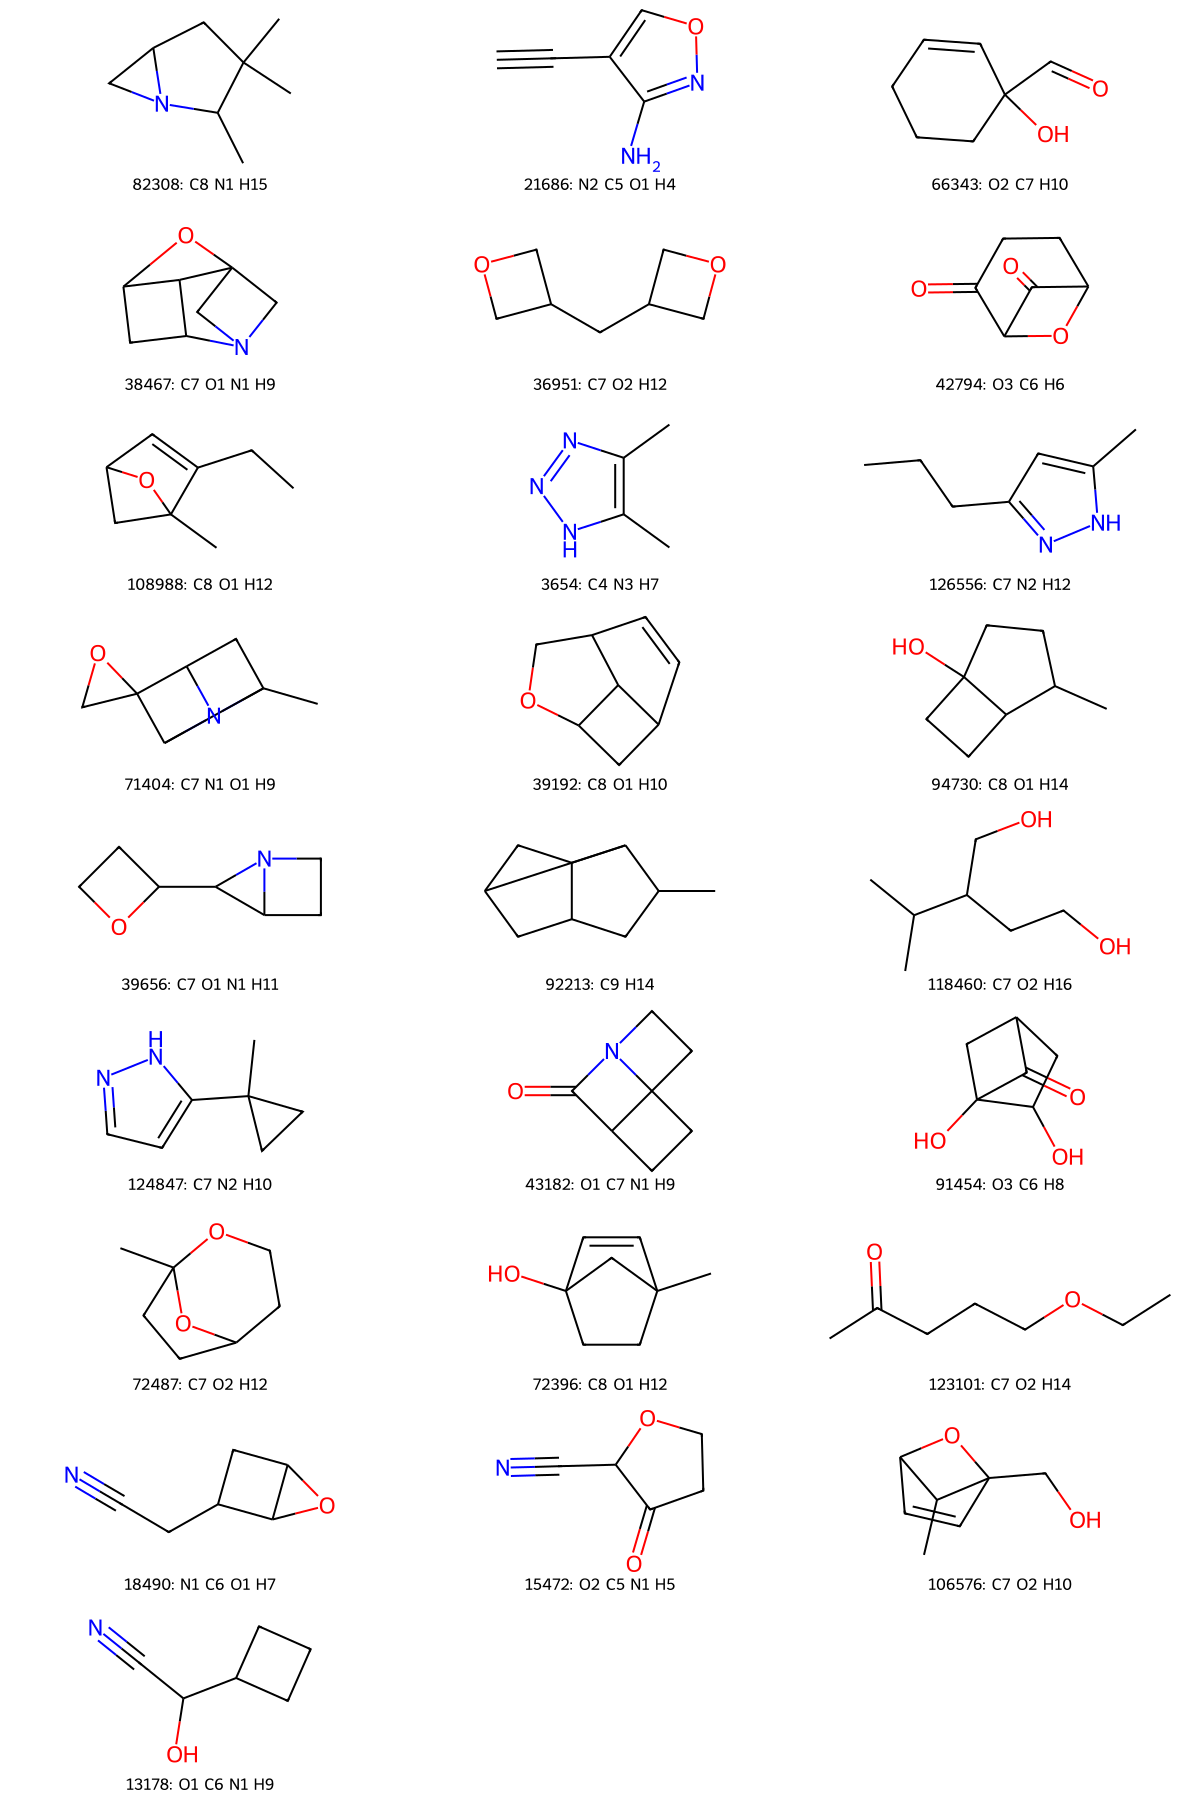

In [51]:
df25mols = pd.read_csv('./Molecules-data/dsgdb9-25xtr.csv',sep="\t")
df25mols.count()
PandasTools.AddMoleculeColumnToFrame(df25mols, smilesCol='SMILES BASIC',includeFingerprints=True,molCol='Molecule')
PandasTools.FrameToGridImage(df25mols, molsPerRow=3, column='Molecule',legends=[
        f"{molecule['dsgdb9 ID']}: {molecule['composition']}"
        for index, molecule in df25mols.iterrows()],
        useSVG=True, subImgSize=(400, 200), maxMols=df25mols.shape[0])

### Calculate the similarity criterion between all pairs of molecules

<div class = "intro">

The MACCS (Molecular ACCess System) keys are one of the most commonly used structural keys. They are sometimes referred to as the MDL keys, named after the company that developed them. While there are two sets of MACCS keys (one with 960 keys and the other containing a subset of 166 keys), only the shorter fragment definitions are available to the public. These 166 public keys are implemented in popular open-source cheminformatics software packages, including RDKit. The fragment definitions for the MACCS 166 keys can be found in [this document](https://github.com/rdkit/rdkit/blob/master/rdkit/Chem/MACCSkeys.py), under the form of [SMARTS](https://www.daylight.com/dayhtml/doc/theory/theory.smarts.html) patterns.

</div>

In [52]:
from rdkit import DataStructs
from rdkit.Chem import MACCSkeys

fpsMK = [MACCSkeys.GenMACCSKeys(mi['Molecule']) for i,mi in df25mols.iterrows()]

Similarity = np.zeros((len(fpsMK),len(fpsMK)))
IDMol = []

for i,mi in df25mols.iterrows():
    IDMol.append(mi['dsgdb9 ID'])
    for j,mj in df25mols.iterrows():
        Similarity[i][j] = DataStructs.DiceSimilarity(fpsMK[i],fpsMK[j]) #This is a numpy array

In [53]:
dfSimilarity = pd.DataFrame(Similarity, columns=IDMol, index=IDMol) 
display(dfSimilarity)

82308     21686     66343     38467     36951     42794     108988  \
82308   1.000000  0.300000  0.192308  0.646154  0.173913  0.185185  0.517241   
21686   0.300000  1.000000  0.080000  0.412698  0.227273  0.153846  0.250000   
66343   0.192308  0.080000  1.000000  0.327273  0.277778  0.590909  0.375000   
38467   0.646154  0.412698  0.327273  1.000000  0.489796  0.421053  0.524590   
36951   0.173913  0.227273  0.277778  0.489796  1.000000  0.421053  0.428571   
42794   0.185185  0.153846  0.590909  0.421053  0.421053  1.000000  0.400000   
108988  0.517241  0.250000  0.375000  0.524590  0.428571  0.400000  1.000000   
3654    0.357143  0.629630  0.043478  0.271186  0.150000  0.083333  0.269231   
126556  0.406780  0.491228  0.204082  0.290323  0.186047  0.156863  0.363636   
71404   0.757576  0.406250  0.285714  0.840580  0.440000  0.379310  0.580645   
39192   0.326531  0.255319  0.358974  0.576923  0.545455  0.439024  0.622222   
94730   0.392857  0.111111  0.695652  0.440678  0.250000  0.458333  0.615385   
39656   0.562500  0.419355  0.296296  0.805970  0.500000  0.428571  0.433333   
92213   0.418605  0.097561  0.181818  0.347826  0.222222  0.228571  0.461538   
118460  0.264151  0.039216  0.465116  0.214286  0.378378  0.266667  0.367347   
124847  0.448276  0.500000  0.250000  0.327869  0.142857  0.120000  0.333333   
43182   0.593750  0.258065  0.407407  0.686567  0.291667  0.500000  0.333333   
91454   0.280702  0.145455  0.723404  0.400000  0.292683  0.571429  0.490566   
72487   0.508475  0.245614  0.448980  0.580645  0.465116  0.549020  0.618182   
72396   0.400000  0.113208  0.755556  0.379310  0.153846  0.468085  0.588235   
123101  0.301887  0.039216  0.418605  0.321429  0.486486  0.355556  0.530612   
18490   0.408163  0.297872  0.307692  0.538462  0.484848  0.439024  0.577778   
15472   0.254545  0.377358  0.533333  0.448276  0.410256  0.638298  0.392157   
106576  0.392857  0.259259  0.478261  0.508475  0.550000  0.500000  0.730769   
13178   0.090909  0.190476  0.529412  0.297872  0.285714  0.388889  0.250000   

          3654      126556    71404   ...    124847    43182     91454   \
82308   0.357143  0.406780  0.757576  ...  0.448276  0.593750  0.280702   
21686   0.629630  0.491228  0.406250  ...  0.500000  0.258065  0.145455   
66343   0.043478  0.204082  0.285714  ...  0.250000  0.407407  0.723404   
38467   0.271186  0.290323  0.840580  ...  0.327869  0.686567  0.400000   
36951   0.150000  0.186047  0.440000  ...  0.142857  0.291667  0.292683   
42794   0.083333  0.156863  0.379310  ...  0.120000  0.500000  0.571429   
108988  0.269231  0.363636  0.580645  ...  0.333333  0.333333  0.490566   
3654    1.000000  0.716981  0.300000  ...  0.692308  0.172414  0.117647   
126556  0.716981  1.000000  0.380952  ...  0.800000  0.262295  0.148148   
71404   0.300000  0.380952  1.000000  ...  0.419355  0.647059  0.360656   
39192   0.186047  0.173913  0.528302  ...  0.177778  0.352941  0.454545   
94730   0.120000  0.339623  0.466667  ...  0.384615  0.413793  0.705882   
39656   0.275862  0.360656  0.794118  ...  0.366667  0.606061  0.305085   
92213   0.162162  0.250000  0.425532  ...  0.205128  0.311111  0.315789   
118460  0.085106  0.320000  0.245614  ...  0.204082  0.181818  0.416667   
124847  0.692308  0.800000  0.419355  ...  1.000000  0.266667  0.226415   
43182   0.172414  0.262295  0.647059  ...  0.266667  1.000000  0.372881   
91454   0.117647  0.148148  0.360656  ...  0.226415  0.372881  1.000000   
72487   0.226415  0.357143  0.634921  ...  0.363636  0.393443  0.444444   
72396   0.122449  0.346154  0.440678  ...  0.392157  0.385965  0.640000   
123101  0.085106  0.320000  0.350877  ...  0.163265  0.254545  0.333333   
18490   0.232558  0.304348  0.566038  ...  0.266667  0.313725  0.409091   
15472   0.244898  0.269231  0.440678  ...  0.235294  0.385965  0.520000   
106576  0.240000  0.226415  0.533333  ...  0.307692  0.310345  0.549020   
13178   0.105263  0.292683  0.291667  ...  0.250000  0

### Heatmap of the chemical similarity, using seaborn

<Figure size 1600x1600 with 0 Axes>

<Axes: >

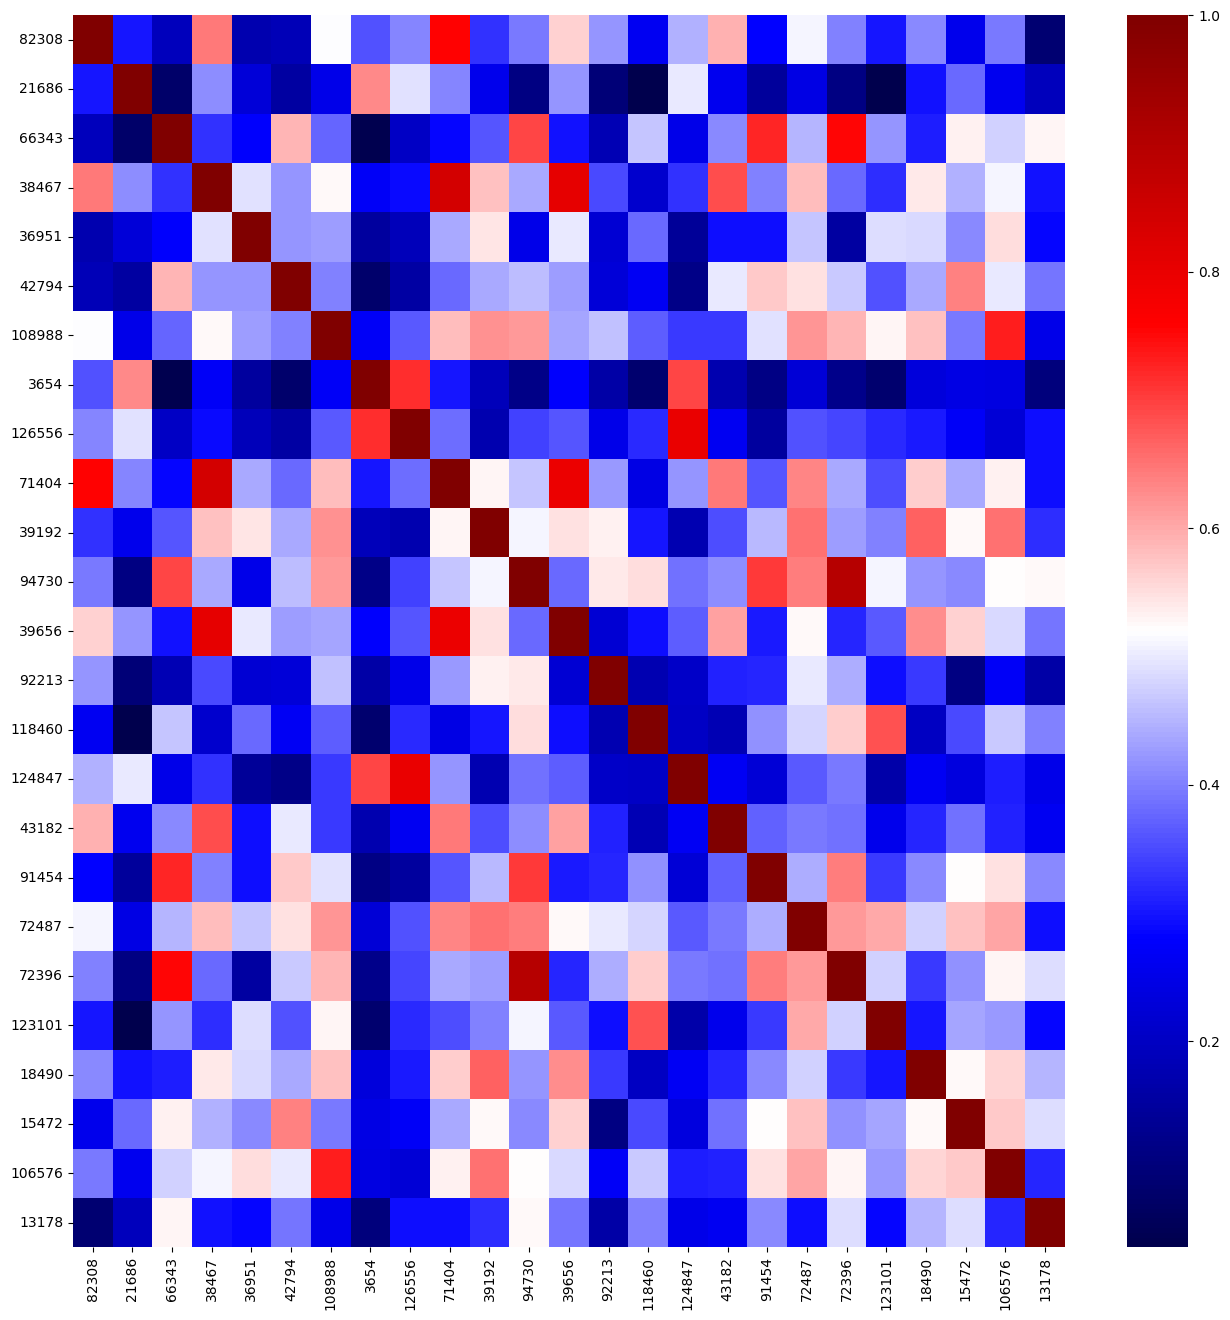

In [54]:
import seaborn as sns
plt.figure(figsize=(16,16))
sns.heatmap(dfSimilarity, cmap='seismic', annot = False)
plt.show()

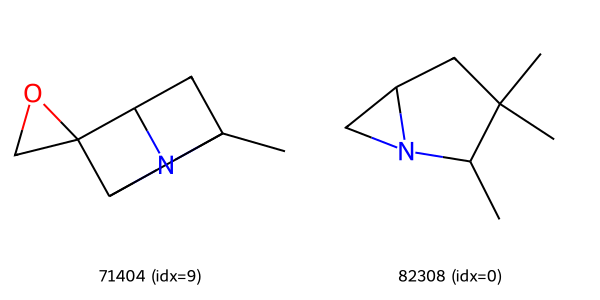

In [77]:
from rdkit.Chem import Draw

def show_two_molecules(df, key1, key2):
    def get_mol(df, key):
        matches = df[df["dsgdb9 ID"] == key]
        if not matches.empty:
            idx = matches.index[0]
        elif key in df.index:
            idx = key
        else:
            print(f"[INFO] Molecule not found: {key}")
            return None, None
        
        return df.loc[idx, "Molecule"], f"{df.loc[idx,'dsgdb9 ID']} (idx={idx})"
    
    mol1, legend1 = get_mol(df, key1)
    mol2, legend2 = get_mol(df, key2)

    if mol1 is None or mol2 is None:
        return None

    img = Draw.MolsToGridImage(
        [mol1, mol2],
        molsPerRow=2,
        subImgSize=(300, 300),
        legends=[legend1, legend2]
    )
    return img


show_two_molecules(df25mols, 71404, 82308)

### Heatmap of the chemical similarity, using plotly

In [ ]:
import plotly.express as px
fig = px.imshow(dfSimilarity, x=dfSimilarity.columns.astype(str), y=dfSimilarity.index.astype(str),color_continuous_scale='RdBu_r')
fig.update_layout(width=1000,height=1000)

## The maximum common structure

<div class='intro'>
    
MCS is defined as the largest substructure that appears in two or more candidate molecules
    
</div>

<div class='rq'>
    
To be developed...
</div>

In [ ]:
from rdkit.Chem import rdFMCS

## Molecular networks

<div class="rqE">

under development
</div>

<div class="intro">

A molecular network is a graph in which the nodes represent molecules (or chemical entities such as fragments, conformers, spectra, etc.), and the edges encode a relationship or similarity between those molecules. It is a way to represent and analyze complex collections of molecules by leveraging tools from graph theory and machine learning.

Depending on the context, it can take several forms:

- In mass spectrometry (MS/MS)
    - A graph is built where molecules (MS/MS spectra) are connected if they share similar fragments.
    - Example: GNPS (Global Natural Products Social Molecular Networking) is a well-known platform for constructing such networks from metabolomics data.
- In cheminformatics / drug design
    - Nodes = molecules (SMILES, 2D/3D structures).
    - Edges = a similarity measure (e.g., Tanimoto on molecular fingerprints such as Morgan fingerprints).

This enables grouping chemical families, exploring diversity, or visualizing reaction trajectories.
</div>

### Tools

In [ ]:
def canonical_smiles_and_mfp(smiles, radius=3, nBits=2048, isomeric=True, countSimulation=False):
    from rdkit.Chem import AllChem
    from rdkit.Chem.rdFingerprintGenerator import GetMorganGenerator
    """
    Return the RDKit-canonical SMILES, the RDKit Mol, and a Morgan fingerprint
    (ECFP) for an input SMILES string.

    Parameters
    ----------
    smiles : str
        Input (possibly non-canonical) SMILES string.
    radius : int, default=3
        Radius for the Morgan fingerprint.
        `radius=2` corresponds to ECFP4,
        `radius=3` to ECFP6.
    nBits : int, default=2048
        Length (number of bits) of the fingerprint vector.
    isomeric : bool, default=True
        Whether to include stereochemistry in the canonical SMILES.
    countSimulation : bool, default=False
        Count fingerprints preserve multiplicity of features, which can improve similarity metrics and ML models when repetition matters

    Returns
    -------
    canonical_smiles : str or None
        Canonical SMILES generated by RDKit, or ``None`` if parsing fails.
    mol : rdkit.Chem.rdchem.Mol or None
        RDKit molecule object, or ``None`` if parsing fails.
    mfp : rdkit.DataStructs.cDataStructs.ExplicitBitVect or None
        Morgan fingerprint bit vector, or ``None`` if parsing fails.

    Notes
    -----
    - Canonicalization is performed by ``Chem.MolToSmiles`` with RDKit defaults.
      If you need stereochemistry encoded, consider using
      ``Chem.MolToSmiles(mol, isomericSmiles=True)``.
    - On invalid SMILES, the function returns ``(None, None, None)``.

    Examples
    --------
    >>> canonical_smiles_and_mfp("OC(C)C")[0]
    'CC(C)O'
    """
    
    mol = Chem.MolFromSmiles(smiles) #create a mol object from input smiles.
    if mol is None:
        return None, None, None
    canonical_smiles = Chem.MolToSmiles(mol, isomericSmiles=isomeric)
    genmfp = GetMorganGenerator(
        radius=radius,
        fpSize=nBits,
        includeChirality=isomeric,  # include stereochemistry bits if desired
        countSimulation=countSimulation # captures repetition of motifs (e.g., multiple phenyls, many tert-butyls) if desired
    )
    mfp = genmfp.GetFingerprint(mol)
    gencnt = GetMorganGenerator(radius=radius,
                                fpSize=nBits,
                                includeChirality=isomeric)
    cmfp = gencnt.GetCountFingerprint(mol)
    return canonical_smiles, mol, mfp, cmfp



### Application

In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs, Draw
from rdkit.Chem import rdFingerprintGenerator
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import PandasTools
# nicer drawings in notebooks
IPythonConsole.ipython_useSVG = True  # crisp SVGs
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

IPythonConsole.drawOptions.bondLineWidth=2
PandasTools.ChangeMoleculeRendering(renderer="SVG")

# Your SMILES list
smiles_list = ["CCCCO", "CCO", "CCOC", "CCN", "c1ccccc1", "c1ccncc1", "CC(=O)O", "CC(=O)OC"]

# Build a DataFrame
df = pd.DataFrame({
    "SMILES": smiles_list,
})

display(df)

In [ ]:
df['CANONICAL SMILES'],df['ROMol'], df['mfp'], df['cmfp'] = zip(*df['SMILES'].apply(lambda s: canonical_smiles_and_mfp(s, countSimulation=True)))
display(df)

PandasTools.FrameToGridImage(df, molsPerRow=5, column='ROMol',legends=[
        f"{index}. {molecule['CANONICAL SMILES']}"
        for index, molecule in df.iterrows()],
        useSVG=True, subImgSize=(200, 200), maxMols=df.shape[0])

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from rdkit import DataStructs

def build_similarity_graph(fps, threshold=0.45, knn=None):
    """
    Build a molecular network from a list of RDKit fingerprints.
    - If knn is set (e.g., 8), connects each node to its k nearest neighbors.
    - Otherwise connects pairs whose Tanimoto >= threshold.
    """
    G = nx.Graph()
    n = len(fps)
    G.add_nodes_from(range(n))
    for i in range(n):
        sims = DataStructs.BulkTanimotoSimilarity(fps[i], fps)
        sims[i] = 0.0  # remove self
        if knn is not None:
            nbrs = np.argsort(sims)[-knn:]
            for j in nbrs:
                w = float(sims[j])
                if w > 0:
                    G.add_edge(i, j, weight=w)
        else:
            for j, w in enumerate(sims):
                if w >= threshold:
                    G.add_edge(i, j, weight=float(w))
    return G

# Build graph (choose one of the two approaches)
G = build_similarity_graph(df['mfp'].tolist(), threshold=0.2)

# Add handy node attributes for later (labels, etc.)
for i in G.nodes():
    G.nodes[i]['smiles'] = df.loc[i, 'SMILES']
    if 'CANONICAL SMILES' in df.columns:
        G.nodes[i]['canonical'] = df.loc[i, 'CANONICAL SMILES']
    print(i,G[i])

# Draw (quick look)
pos = nx.spring_layout(G, weight='weight', seed=42)
edge_w = [1.0 + 3.0 * G[u][v]['weight'] for u, v in G.edges()]
labels = {i: G.nodes[i].get('canonical', G.nodes[i]['smiles']) for i in G.nodes()}

plt.figure(figsize=(7,6))
nx.draw_networkx_edges(G, pos, width=edge_w, alpha=0.3)
nx.draw_networkx_nodes(G, pos, node_size=100)
nx.draw_networkx_labels(G, pos, labels=labels, font_size=12)
plt.axis('off')
plt.title('Molecular network (Morgan/Tanimoto)')
plt.show()

# Optional: export to Cytoscape/Gephi
nx.write_graphml(G, 'molecular_network.graphml')


# A word about descriptors and fingerprints

<div class = "intro">
    
A fingerprint is a structural descriptor

- **1D molecular descriptor**
    - Global descriptor: only one value represents the whole molecule
    - Example: : solubility, logP, molecular weight, melting point, ...
    - Usually do not contain enough information to be applied to machine learning (ML)
    - Can be added to 2D fingerprints to improve molecular encoding for ML
    
- **2D molecular descriptors**: 
    - Detailed representation of individual parts of the molecule
    - Example: molecular graphs, paths, fragments, atom environments
    - Contains many features/bits per molecule called fingerprints
    - Very often used in similarity search and ML

- **3D molecular descriptors**: 
    - Example: shape, stereochemistry
    - Less robust than 2D representations because of molecule flexibility (what is the “right” conformation of a molecule?) Biological similarity
    - Biological fingerprint, e.g. individual bits represent bioactivity measure against different targets
    - Independent of molecular structure
    - Requires experimental (or predicted) data

</div>

# Useful resources

<div class="intro">
   
- [Teaching material for computer-aided drug design, TeachOpenCADD](https://projects.volkamerlab.org/teachopencadd/index.html)
- [Daylight theory manual](https://www.daylight.com/dayhtml/doc/theory/index.html)
- [Creation of easily interpretable visualization for SMARTS expression](https://smarts.plus/)
</div>

# End

In [ ]:
vID.end(cwd0)